# ONLINE PAYMENTS FRAUD DETECTION DATASET CASE STUDY
- Blossom Bank also known as BB PLC is a multinational financial services group, that offers retail and investment banking, pension management,
- asset  management, and payments services, headquartered in London, UK

THE PROBLEM THAT IS TO BE SOLVED: 

- The goal is to build a predictive model that can effectively classify transactions as fraudulent or non-fraudulent based on various features such as transaction type, amount, customer information, and balance changes. This model will enable Blossom Bank (BB PLC) to detect and prevent fraudulent activities, protecting both the bank and its customers from financial losses and potential security breaches.

- By analyzing the provided dataset and conducting exploratory data analysis (EDA), I aim to identify patterns, trends, and relationships in the data that can help distinguish fraudulent transactions from legitimate ones.

- Furthermore, by evaluating the performance of the model using metrics such as accuracy and precision, recall, I assessed its effectiveness in correctly identifying fraudulent transactions and minimizing false negatives or false positives.

- The objective is to provide Blossom Bank with a robust and reliable fraud detection model that can be deployed in real-time to proactively identify and mitigate fraudulent online payment transactions, safeguarding the bank's financial integrity and ensuring a secure and trustworthy payment ecosystem for its customers.

- Case Study by IFEOMA AUGUSTA ADIGWE

In [1]:
import pandas as pd
import numpy as np

# Import visual python libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset into a pandas dataframe

data = pd.read_csv(r'C:\Users\iphy2\Downloads\Online Payment Fraud Detection.csv')
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


In [3]:
## Check the shape of the data

data.shape

(1048575, 10)

In [4]:
## Check the missing values

data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [5]:
## Statistical descrtiptive analysis of the numerical data

data.describe().astype('int')

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874009,893808,978160,1114197,0
std,15,264940,2971750,3008271,2296780,2416593,0
min,1,0,0,0,0,0,0
25%,15,12149,0,0,0,0,0
50%,20,76343,16002,0,126377,218260,0
75%,39,213761,136642,174599,915923,1149807,0
max,95,10000000,38900000,38900000,42100000,42200000,1


#  Exploratory Data Analysis

In [6]:
# Calculate the percentage of fraudulent transactions
fraud_percentage = (data['isFraud'].sum() / len(data)) * 100
print("Percentage of fraudulent transactions: {:.2f}%".format(fraud_percentage))

Percentage of fraudulent transactions: 0.11%


# Univariate Analysis

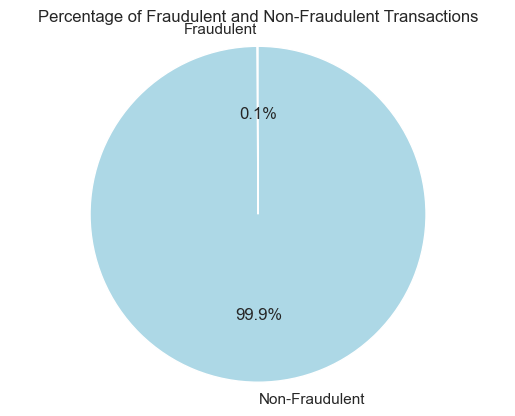

In [32]:

# Calculate the percentage of fraudulent and non-fraudulent transactions

fraud_percentage = (data['isFraud'].sum() / len(data)) * 100
non_fraud_percentage = 100 - fraud_percentage

# Create a pie chart to visualize the percentages
labels = ['Fraudulent', 'Non-Fraudulent']
sizes = [fraud_percentage, non_fraud_percentage]
colors = ['#FF0000', '#ADD8E6']  # white used for fraudulent, light blue used for non-fraudulent

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Percentage of Fraudulent and Non-Fraudulent Transactions')
plt.show()

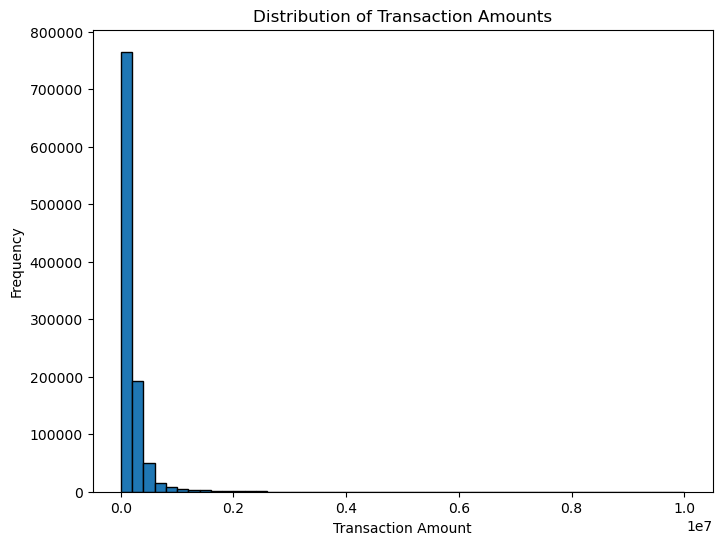

In [29]:
# Plot a histogram of the 'amount' column

plt.figure(figsize=(8, 6))
plt.hist(data['amount'], bins=50, edgecolor='k')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()

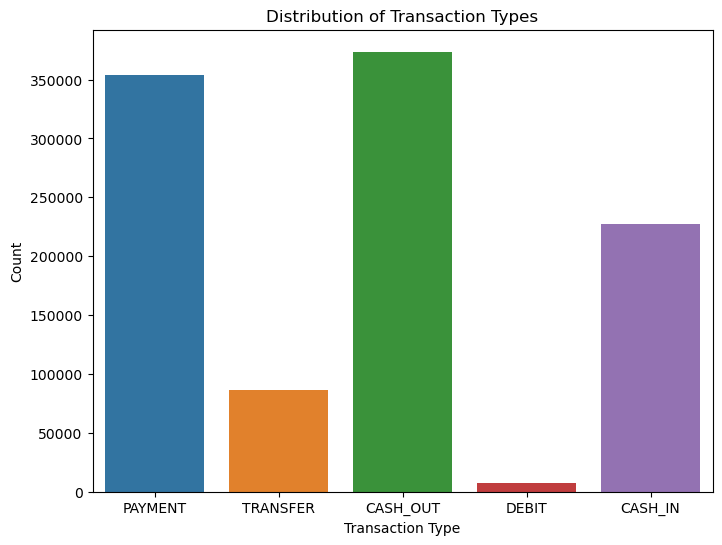

In [30]:

# Plot a bar chart of the transaction types
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Distribution of Transaction Types')
plt.show()

# Multivariate Analysis

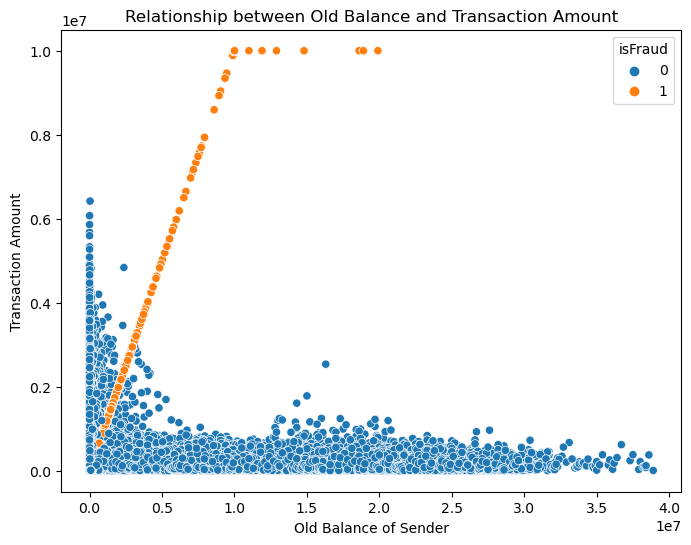

In [31]:
# Scatter plot of 'amount' vs. 'oldbalanceOrg'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='oldbalanceOrg', y='amount', hue='isFraud')
plt.xlabel('Old Balance of Sender')
plt.ylabel('Transaction Amount')
plt.title('Relationship between Old Balance and Transaction Amount')
plt.show()

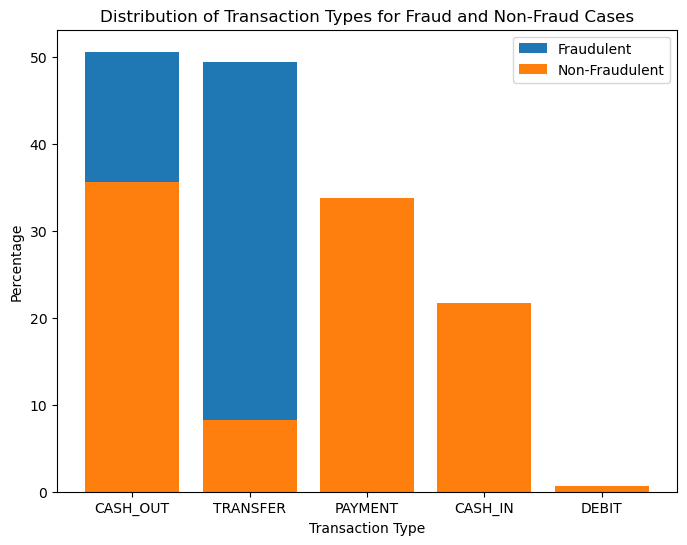

In [16]:
# Compare the distribution of transaction types for fraud and non-fraud cases
fraud_data = data[data['isFraud'] == 1]
non_fraud_data = data[data['isFraud'] == 0]

fraud_type_counts = fraud_data['type'].value_counts(normalize=True) * 100
non_fraud_type_counts = non_fraud_data['type'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
plt.bar(fraud_type_counts.index, fraud_type_counts.values, label='Fraudulent')
plt.bar(non_fraud_type_counts.index, non_fraud_type_counts.values, label='Non-Fraudulent')
plt.xlabel('Transaction Type')
plt.ylabel('Percentage')
plt.title('Distribution of Transaction Types for Fraud and Non-Fraud Cases')
plt.legend()
plt.show()

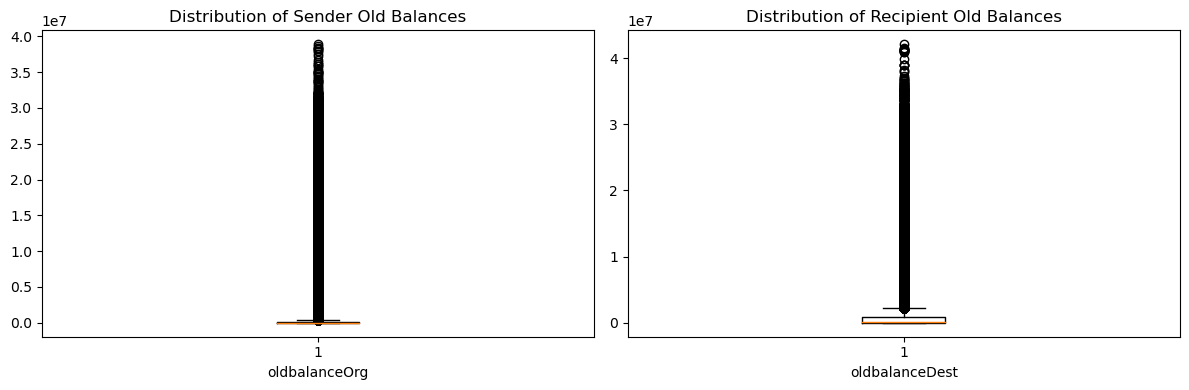

In [13]:
# Analyze the distribution of 'oldbalanceOrg' and 'oldbalanceDest'

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.boxplot(data['oldbalanceOrg'])
plt.xlabel('oldbalanceOrg')
plt.title('Distribution of Sender Old Balances')

plt.subplot(1, 2, 2)
plt.boxplot(data['oldbalanceDest'])
plt.xlabel('oldbalanceDest')
plt.title('Distribution of Recipient Old Balances')

plt.tight_layout()
plt.show()

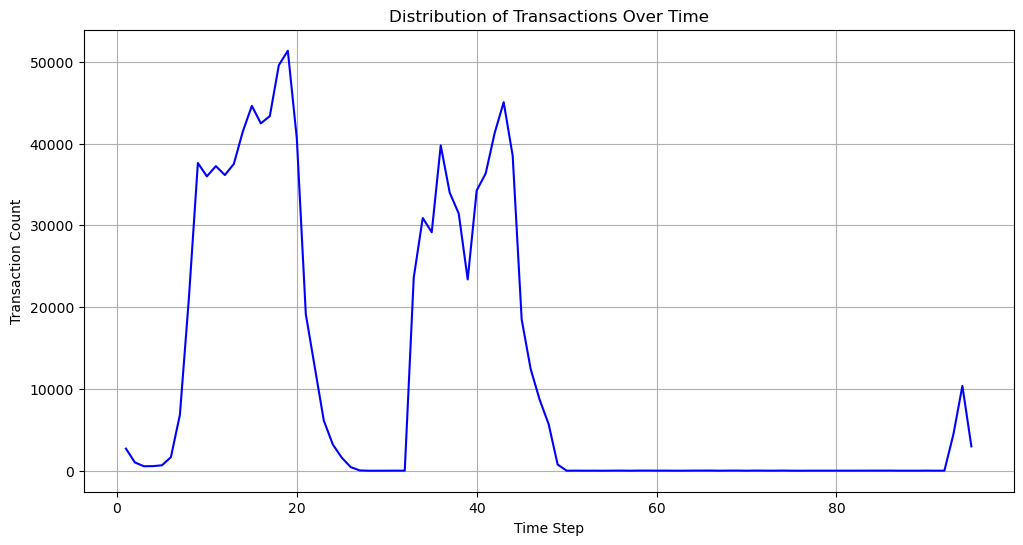

In [14]:

# Group transactions based on the 'step' column and calculate the counts
transaction_counts = data.groupby('step')['step'].count()

# Analyze the distribution of transactions over time
plt.figure(figsize=(12, 6))
plt.plot(transaction_counts, color='blue')
plt.xlabel('Time Step')
plt.ylabel('Transaction Count')
plt.title('Distribution of Transactions Over Time')
plt.grid(True)
plt.show()

In [ ]:
# Plot a sns.pairplot to view relationship between features on my dataset
# Pairplot of selected numeric columns

numeric_columns = ['amount', 'oldbalanceOrg', 'oldbalanceDest', 'newbalanceOrig', 'newbalanceDest']
sns.pairplot(data=data, vars=numeric_columns, hue='isFraud')
plt.title('Pairplot of Numeric Columns')
plt.show()

# Visualize relationships between the label and some key features

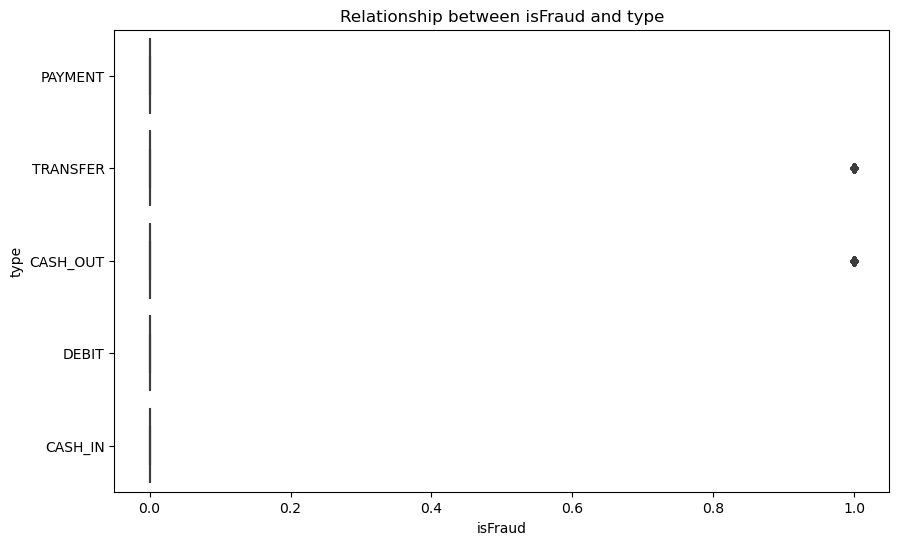

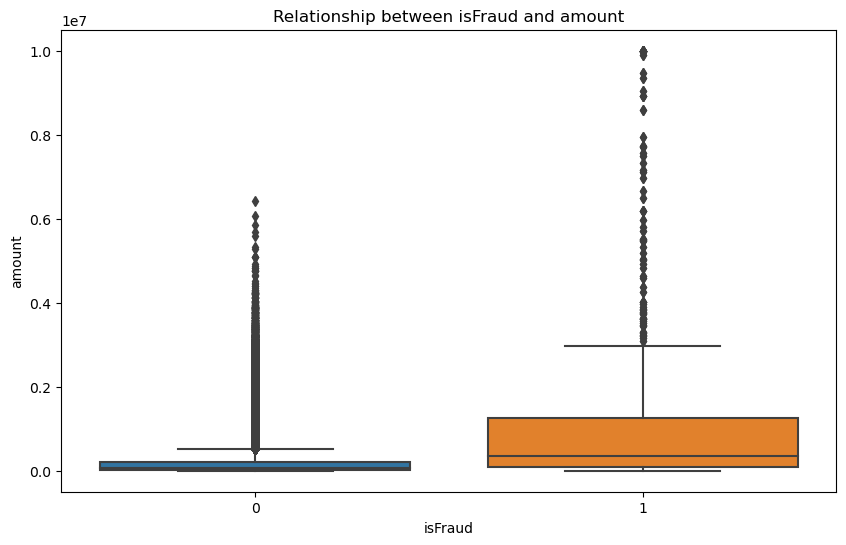

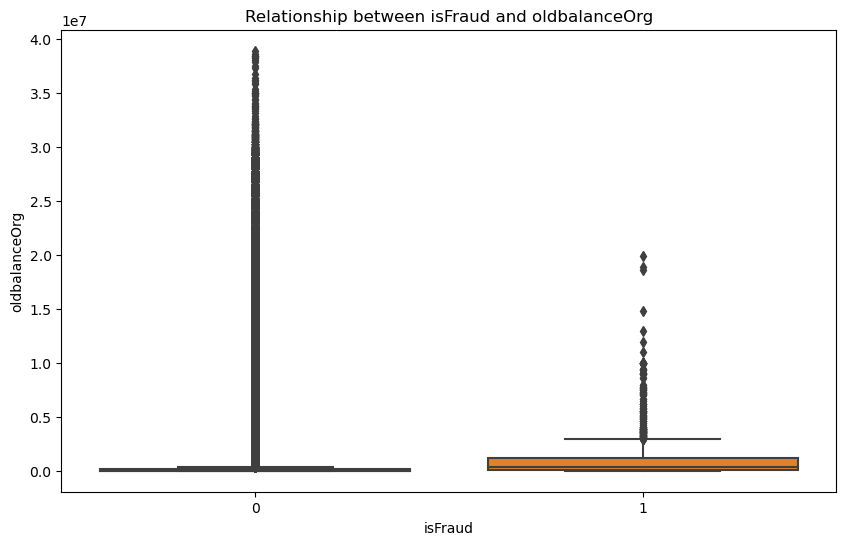

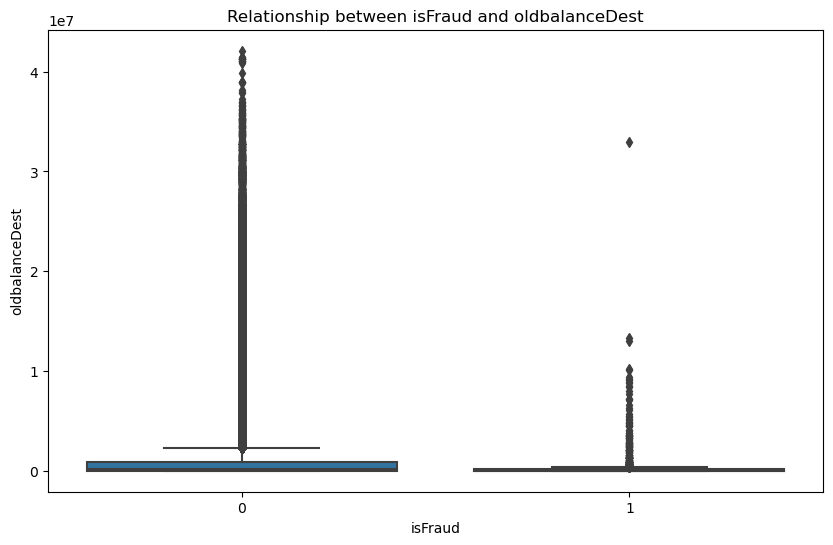

In [15]:

# Select key features for visualization
key_features = ['type', 'amount', 'oldbalanceOrg', 'oldbalanceDest']

# Plot relationships between the label and key features
for feature in key_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='isFraud', y=feature, data=data)
    plt.xlabel('isFraud')
    plt.ylabel(feature)
    plt.title('Relationship between isFraud and {}'.format(feature))
    plt.show()

# Explore correlations

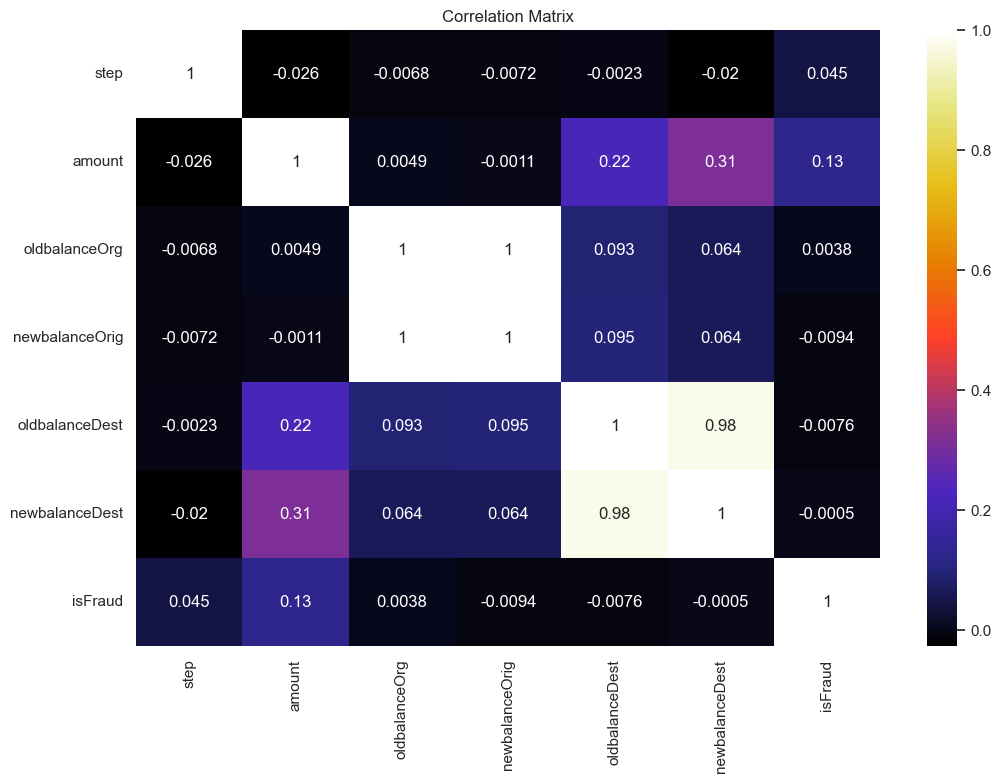

In [28]:

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='CMRmap')
plt.title('Correlation Matrix')
plt.show()


#  Encoding categorical variables

In [41]:
import pandas as pd
import numpy as np

# Import visual python libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset into a pandas dataframe

data = pd.read_csv(r'C:\Users\iphy2\Downloads\Online Payment Fraud Detection.csv')
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


In [43]:
# drop the ambiguous columns

data = data.drop(['nameOrig', 'nameDest'], axis=1)

In [44]:
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


### Using One-Hot Encoding to Convert the Categoriacal Variables

In [45]:
categorical = ['type']
categories_dummies = pd.get_dummies(data[categorical])
categories_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [46]:
data[categorical]

,type
0,PAYMENT
1,PAYMENT
2,TRANSFER
3,CASH_OUT
4,PAYMENT
...,...
1048570,CASH_OUT
1048571,PAYMENT
1048572,PAYMENT
1048573,PAYMENT


In [47]:
data = pd.concat([data, categories_dummies], axis = 1)

print(data.shape)
data.head()

(1048575, 13)


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [48]:
data = data.drop(categorical, axis = 1)
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0


In [49]:
data.tail()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
1048570,95,132557.35,479803.00,347245.65,484329.37,616886.72,0,0,1,0,0,0
1048571,95,9917.36,90545.00,80627.64,0.00,0.00,0,0,0,0,1,0
1048572,95,14140.05,20545.00,6404.95,0.00,0.00,0,0,0,0,1,0
1048573,95,10020.05,90605.00,80584.95,0.00,0.00,0,0,0,0,1,0
1048574,95,11450.03,80584.95,69134.92,0.00,0.00,0,0,0,0,1,0


In [50]:
#Define your target variable

y = data['isFraud']
y.head()

0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64

In [51]:
data.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

# 

In [52]:
y = data.isFraud
X = data.drop('isFraud', axis = 1)
X.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


# Prepare my Model

In [53]:
# Create a train and test dataset

from sklearn.model_selection import train_test_split

In [54]:
# Split the dataset with test size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.3, random_state = 10, stratify = y)

In [55]:
print('\n', X_train.head())
print('\n', X_test.head())
print('\n', y_train.head())
print('\n', y_test.head())


         step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
944297    43   14289.14        93723.0        79433.86       454369.55   
831978    41   22381.74            0.0            0.00            0.00   
870214    42   76579.80        20954.0            0.00            0.00   
606842    34  364012.39        39826.0            0.00       794775.09   
927094    43   15873.98            0.0            0.00            0.00   

        newbalanceDest  type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  \
944297       468658.69             0              1           0             0   
831978            0.00             0              0           0             1   
870214        26885.94             0              1           0             0   
606842      1221909.34             0              1           0             0   
927094            0.00             0              0           0             1   

        type_TRANSFER  
944297              0  
831978            

# Train my Model

1. Decision Tree Classifier

In [56]:
# Decision Tree Classifier algorithm

from sklearn.tree import DecisionTreeClassifier
DC_model = DecisionTreeClassifier()

# Fit the model

DC_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [57]:
# Create the prediction

DC_preds = DC_model.predict(X_test)

In [58]:
# Import accuracy score

from sklearn.metrics import accuracy_score

# Print accurancy score

print(accuracy_score(DC_preds, y_test))

0.9995517733562639


 Observation
- the accuracy score for Decision Tree Classifer is approximately 99.95%

2. KNeighbors Classifier


In [61]:
# import the  KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier

In [62]:
# Create the Module

KN_model = KNeighborsClassifier()

In [63]:
# Fit the model

KN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [64]:
# Create the prediction

KN_preds = KN_model.predict(X_test)

c:\Users\iphy2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [65]:
# Import accuracy score

from sklearn.metrics import accuracy_score

# Print accuracy score

print(accuracy_score(KN_preds, y_test))

0.9993642175266154


 Observation
- the accuracy score for KNeighbors Classifier is approximately 99.93%

3. Random Forest Classifier

In [72]:
# import the Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier() # Create model

In [73]:
RF_model.fit(X_train, y_train) # Fit the model

RandomForestClassifier()

In [75]:
# Create the prediction

RF_preds = RF_model.predict(X_test)

# Import accuracy score

from sklearn.metrics import accuracy_score

# Print accuracy score

print(accuracy_score(RF_preds, y_test))

0.999755223747747


 Observation
- the accuracy score for Random Forest Classifer is approximately 99.97%

# Confusion Matrix

In [76]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [77]:
#  Split into training and validation sets using 40% split ratio

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.4) 

In [78]:
# Create a list of your models

models = [DC_model, RF_model, KN_model]

In [79]:
def plot_confusion_matrix(y_valid, prediction):
    cm_ = confusion_matrix(y_valid, prediction)
    plt.figure(figsize = (6, 4))
    sns.heatmap(cm_, cmap = 'coolwarm',
               linecolor = 'white',
               linewidths = 1,
               annot = True,
               fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [80]:
from sklearn.metrics import confusion_matrix

In [81]:
def trainer(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train) # to fit the model
    prediction = model.predict(X_valid) # predicting on the fitted model
    # Print evaluation metrics
    print('\n For{}, Accuracy Score is {} \n'.format(model.__class__.__name__, accuracy_score(prediction, y_valid)))
    print(classification_report(prediction, y_valid)) # classification report for evaluating our models
    plot_confusion_matrix(y_valid, prediction)


 ForDecisionTreeClassifier, Accuracy Score is 0.9996423717902868 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    418985
           1       0.84      0.82      0.83       445

    accuracy                           1.00    419430
   macro avg       0.92      0.91      0.91    419430
weighted avg       1.00      1.00      1.00    419430



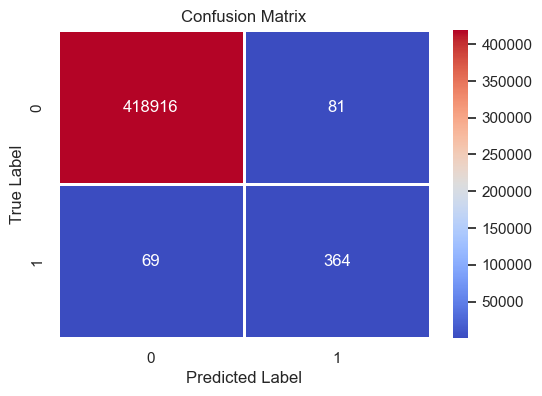


 ForRandomForestClassifier, Accuracy Score is 0.9997878072622368 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419084
           1       0.80      1.00      0.89       346

    accuracy                           1.00    419430
   macro avg       0.90      1.00      0.94    419430
weighted avg       1.00      1.00      1.00    419430



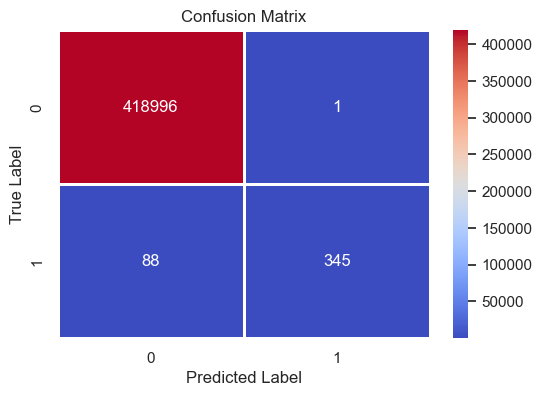

c:\Users\iphy2\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



 ForKNeighborsClassifier, Accuracy Score is 0.9993991846076818 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419101
           1       0.59      0.78      0.67       329

    accuracy                           1.00    419430
   macro avg       0.79      0.89      0.83    419430
weighted avg       1.00      1.00      1.00    419430



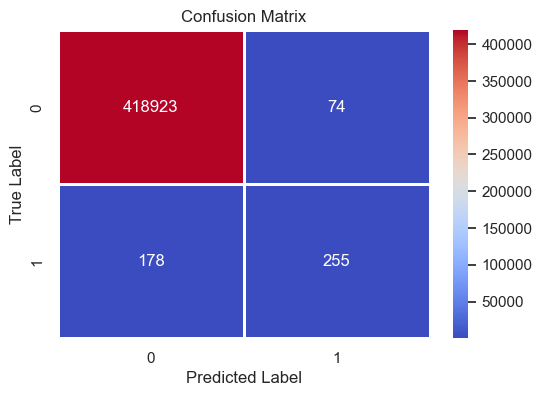

In [82]:
for model in models:
    trainer(model, X_train, y_train, X_valid, y_valid)

# Observation on Metric Evaluation

- Its observed that Random Forest Classifier has 99.97% accuracy score  compared to other models that was 
trained and validated. The implication of that is there is 0.1% likelihood that an online payment fraud will occur. 

# Analyze the results of my trained models

In [83]:
# Evaluate your models using K-fold cross validation

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict, cross_val_predict

#Prepare the cross-validation procedure

cv = KFold(n_splits = 10, random_state = 1, shuffle = True)

# Evaluating my models

1.  Accuracy

In [84]:
# Create a function to train a model with cross validation and evaluate accuracy

def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model'''
    scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1) # Evaluate model

    print('Accuracy: %.3f' % (mean(scores)))

In [85]:
# Train and Predict, Looping through the list of models

for model in models:
    trainer_with_cv(model, X_train, y_train)

Accuracy: 1.000
Accuracy: 1.000
Accuracy: 0.999


2. Check for Recall

In [86]:
# Create a function to train a model with cross validation and evaluate recall

def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model'''
    scores = cross_val_score(model, X, y, scoring = 'recall', cv = cv, n_jobs = -1) # Evaluate model

    print('Recall: %.3f' % (mean(scores)))

In [87]:
# Train and Predict, Looping through the list of models

for model in models:
    trainer_with_cv(model, X_train, y_train)

Recall: 0.805
Recall: 0.784
Recall: 0.507


3. Precision

In [88]:
# Create a function to train a model with cross validation and evaluate recall

def trainer_with_cv(model, X, y):
    '''Cross validation function. Expects a model'''
    scores = cross_val_score(model, X, y, scoring = 'recall', cv = cv, n_jobs = -1) # Evaluate model

    print('Precision: %.3f' % (mean(scores)))

In [89]:
# Train and Predict, Looping through the list of models

for model in models:
    trainer_with_cv(model, X_train, y_train)

Precision: 0.806
Precision: 0.784
Precision: 0.507


### Should the business be more concerned with better results on false negatives or true positives?

When evaluating the performance of a fraud detection model, the two crucial metrics to consider are false negatives and true positives.

- False negatives: These occur when fraudulent transactions are incorrectly classified as non-fraudulent. False negatives represent missed fraud cases, which can have serious consequences for the business. If the business is more concerned about minimizing the risk of undetected fraud and preventing financial losses, they should focus on reducing false negatives. This means placing a higher priority on accurately identifying as many fraudulent transactions as possible.

- True positives: These are cases where fraudulent transactions are correctly identified as fraudulent. True positives represent successful fraud detection. If the business is more concerned about maintaining a low rate of false alarms and minimizing disruptions for legitimate customers, they should prioritize maximizing true positives. This means ensuring that genuine customers are not mistakenly flagged as fraudsters.

The decision on whether to prioritize false negatives or true positives depends on the business's risk tolerance, regulatory requirements, and the costs associated with different types of errors. Striking the right balance is crucial, as aggressively reducing false negatives may lead to a higher number of false positives, inconveniencing legitimate customers. Conversely, focusing solely on true positives may result in missed fraud cases.

- I believe to determine the most important metric, This evaluation should consider factors such as financial losses due to fraud, customer experience, regulatory compliance, and the business's overall risk appetite. By carefully analyzing these factors, the business can make an informed decision on which metric to prioritize and adjust the fraud detection model accordingly.